In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

sns.set(style="whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()  # choose the CSV they gave for Task 3

# Load into pandas (automatically picks the uploaded filename)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()


Saving bank.csv to bank.csv


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [4]:
import pandas as pd

# Adjust filename if different
df = pd.read_csv("bank.csv", sep=';', quotechar='"')


In [5]:
print(df.shape)
display(df.head())
print(df['y'].value_counts())  # 'y' is the target: whether they subscribed (yes/no)


(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


y
no     4000
yes     521
Name: count, dtype: int64


Shape: (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


None

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN



Target counts (y):
y
no     4000
yes     521
Name: count, dtype: int64


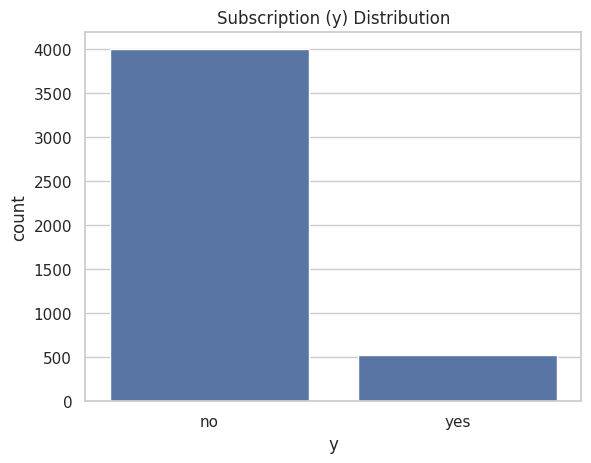

In [6]:
# Basic info
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all'))

# Target distribution
print("\nTarget counts (y):")
print(df['y'].value_counts())
sns.countplot(x='y', data=df); plt.title("Subscription (y) Distribution"); plt.show()


In [7]:
# Check for missing values (should be none in this dataset)
print(df.isnull().sum())

# If any whitespace around categorical entries, strip it
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Target: map yes/no to 1/0
df['target'] = df['y'].map({'yes': 1, 'no': 0})
df.drop(columns=['y'], inplace=True)

# One-hot encode categorical features (drop first to avoid multicollinearity)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Accuracy: 0.8486187845303867

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       801
           1       0.37      0.45      0.41       104

    accuracy                           0.85       905
   macro avg       0.65      0.68      0.66       905
weighted avg       0.86      0.85      0.86       905



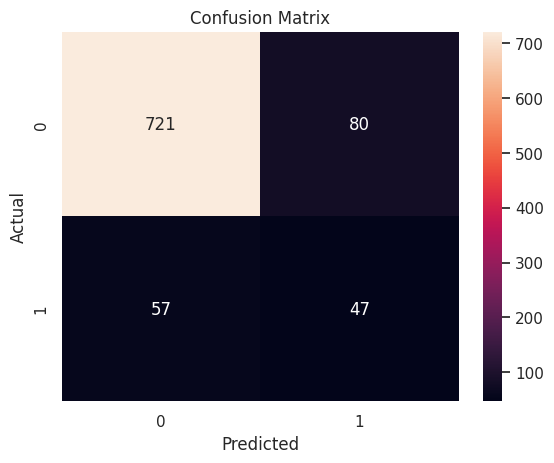

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d');
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()


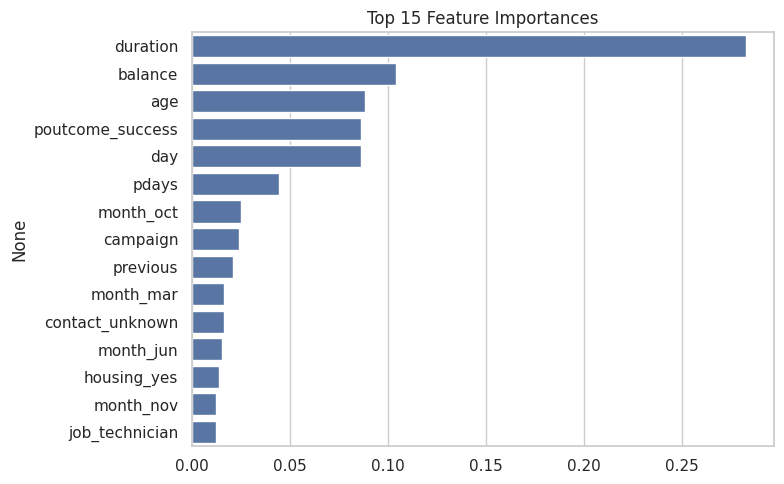

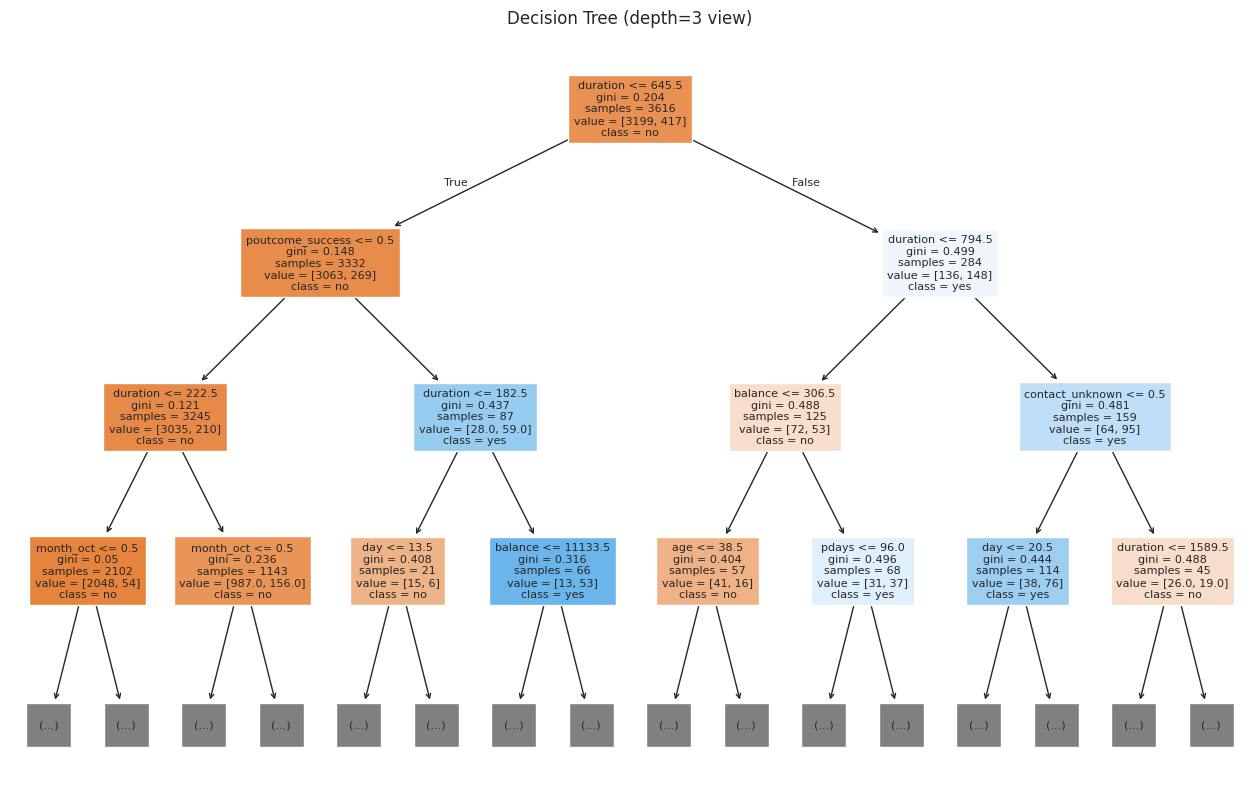

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Feature importance
feat_imp = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

# Partial tree plot
plt.figure(figsize=(16,10))
plot_tree(dt, filled=True, max_depth=3, feature_names=X.columns, class_names=['no','yes'], fontsize=8)
plt.title("Decision Tree (depth=3 view)")
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,7,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5],
    'criterion': ['gini','entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best = grid.best_estimator_
y_pred_best = best.predict(X_test)
print("Best params:", grid.best_params_)
print("\nTuned classification report:\n", classification_report(y_test, y_pred_best, zero_division=0))


Best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Tuned classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.52      0.35      0.42       104

    accuracy                           0.89       905
   macro avg       0.72      0.65      0.68       905
weighted avg       0.87      0.89      0.88       905

